In [1]:
import pandas as pd
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split # 셔플해주는 라이브러리
from sklearn import metrics # 평가를 위한 라이브러리
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('data/mushroom.csv')

In [3]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 목표
- 버섯의 특징을 활용해 독/식용 분류

In [4]:
data.shape

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
X = data.loc[:,'cap-shape':] 
y = data.loc[:, 'poisonous']# 답

In [7]:
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
y.value_counts() #중복제거 된 데이터의 수를 알려줌

e    4208
p    3916
Name: poisonous, dtype: int64

# 원 핫 인코딩

In [9]:
X_one_hot = pd.get_dummies(X)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# 라벨 인코딩

In [22]:
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [23]:
habitat_dic = {
    
    'u':1, 'g':2, 'm':3, 'd':4, 'p':5, 'w':6, 'l':7
}

In [24]:
X['habitat'].map(habitat_dic)

0       1
1       2
2       3
3       1
4       2
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y,
                                                       test_size = 0.3,
                                                       random_state = 3)

In [26]:
tree_model = DecisionTreeClassifier()

In [27]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
pre = tree_model.predict(X_test)

In [29]:
metrics.accuracy_score(pre, y_test)

1.0

# 시각화 

In [30]:
!pip install graphviz

In [33]:
from sklearn.tree import export_graphviz

In [34]:
export_graphviz(tree_model, out_file = 'tree.dot', 
               class_names = ['독', '식용'],
               feature_names = X_one_hot.columns,
               impurity=False, filled = True)

In [35]:
import graphviz

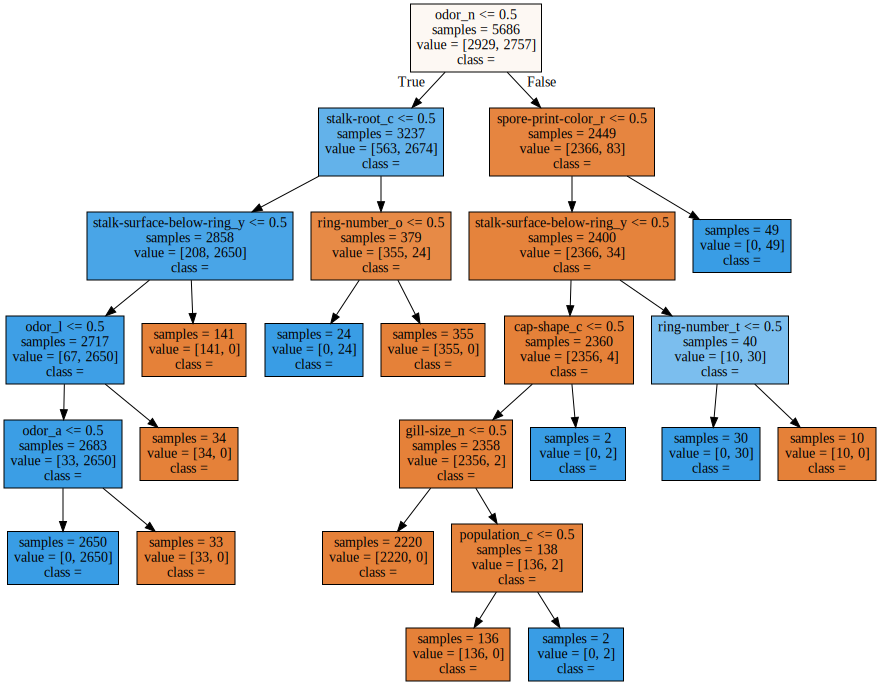

In [36]:
with open('tree.dot', encoding = 'UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
    

# 특성선택

In [37]:
fi = tree_model.feature_importances_

In [38]:
importance_df = pd.DataFrame(fi, index=X_one_hot.columns)

In [40]:
importance_df.sort_values(by = 0, ascending = False)

,0
odor_n,0.616063
stalk-root_c,0.175846
stalk-surface-below-ring_y,0.105295
spore-print-color_r,0.032861
odor_l,0.023063
...,...
gill-color_b,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000
gill-spacing_c,0.000000
